In [38]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import matplotlib.pyplot as plt
from PIL import Image

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    sys.path.append(path)

from neurolib_dev_optControl.neurolib.models.aln import ALNModel
import neurolib_dev_optControl.neurolib.dashboard.layout as layout
import neurolib_dev_optControl.neurolib.dashboard.data as data
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

cmap_ = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors_rgba()
exc_red = cmap_(3)
inh_blue=cmap_(0)
green = cmap_(2)

savepath_FENS = (os.getcwd().split('neurolib')[0] + 'Talks_Conf_Workshops_Schools' + os.sep + '22' + os.sep + 'FRANCE22' + 
     os.sep + 'FENS' + os.sep + 'poster' + os.sep + 'print' + os.sep + 'images')
savepath_ENCODS = (os.getcwd().split('neurolib')[0] + 'Talks_Conf_Workshops_Schools' + os.sep + '22' + os.sep + 'FRANCE22' + 
     os.sep + 'ENCODS' + os.sep + 'poster' + os.sep + 'images')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
aln = ALNModel()
N = aln.params.N

data.set_parameters(aln)

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]

In [40]:
##### LOAD BOUNDARIES
data_file = '..' + os.sep + 'boundaries' + os.sep + 'boundary_bi_granular.pickle'
with open(data_file,'rb') as f:
    load_array= pickle.load(f)
exc_bi = load_array[0]
inh_bi = load_array[1]

data_file = '..' + os.sep + 'boundaries' + os.sep + 'boundary_LC_granular.pickle'
with open(data_file,'rb') as f:
    load_array= pickle.load(f)
exc_lc = load_array[0]
inh_lc = load_array[1]

data_file = '..' + os.sep + 'boundaries' + os.sep + 'boundary_LCbi_granular.pickle'
with open(data_file,'rb') as f:
    load_array= pickle.load(f)
exc_lch = load_array[0]
inh_lch = load_array[1]

print(exc_lch)
print(inh_lch)

[0.38, 0.38, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.41, 0.405, 0.4, 0.395, 0.39, 0.385, 0.38]
[0.3, 0.305, 0.31, 0.315, 0.315, 0.32, 0.325, 0.33, 0.33, 0.33, 0.325, 0.325, 0.32, 0.315, 0.31, 0.305, 0.3]


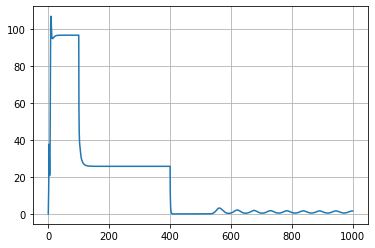

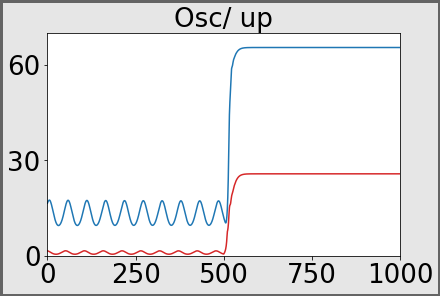

In [41]:
fs_ = 4*36/5.5
lw_ = 5

#### example lc-high
aln.params.mue_ext_mean = 0.4 * 5.
aln.params.mui_ext_mean = 0.322 * 5.

duration = 1000.
aln.params.duration = duration

stim = np.zeros(( 1, int(duration/aln.params.dt) ))
stim[0,0:1000] = 2.
stim[0,4000:5000] = -2.

aln.params.ext_exc_current = stim

aln.run()
plt.plot(aln.t, aln.rates_exc[0,:])
plt.show()

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]
        
setinit(init_state_vars, aln)
stim = np.zeros(( 1, int(duration/aln.params.dt) ))
stim[0,5000:5100] = 0.5

aln.params.ext_exc_current = stim
aln.run()

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True, linewidth=lw_,
                       edgecolor=darkgrey, facecolor=lightgrey)

ax.set_title('Osc/ up', fontsize=fs_)

ax.plot(aln.t, aln.rates_exc[0,:], color=exc_red, label='$r_E$')
ax.plot(aln.t, aln.rates_inh[0,:], color=inh_blue, label='$r_I$')

ax.tick_params(axis='x', labelsize=fs_)
ax.tick_params(axis='y', labelsize=fs_)
#ax.set_xlabel(r'Time [ms]', fontsize=fs_)
#ax.set_ylabel('Activity [Hz]', fontsize=fs_)
ax.set_xlim(0,duration)
ax.set_ylim(0,70.)
ax.set_yticks(np.arange(0,61,30))
#ax.legend(fontsize=fs_)
ax.grid(False)

im_highlc = 'High_LC.png'
fig.savefig(im_highlc, edgecolor=darkgrey)
fig.savefig(os.path.join(savepath, im_highlc), edgecolor=fig.get_edgecolor(), facecolor=fig.get_facecolor())
plt.show()

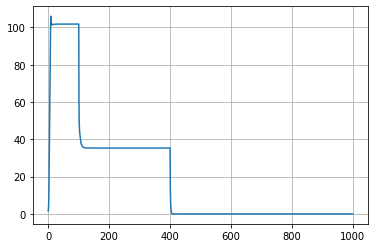

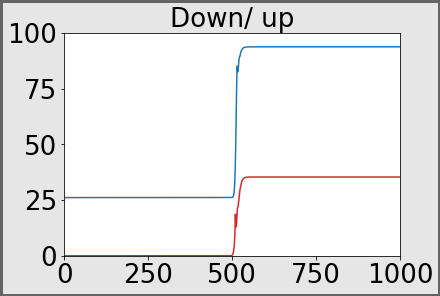

In [42]:
#### example low-high
aln.params.mue_ext_mean = 0.45 * 5.
aln.params.mui_ext_mean = 0.5 * 5.

duration = 1000.
aln.params.duration = duration

stim = np.zeros(( 1, int(duration/aln.params.dt) ))
stim[0,0:1000] = 2.
stim[0,4000:5000] = -2.

aln.params.ext_exc_current = stim

aln.run()
plt.plot(aln.t, aln.rates_exc[0,:])
plt.show()

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]
        
setinit(init_state_vars, aln)
stim = np.zeros(( 1, int(duration/aln.params.dt) ))
stim[0,4900:5100] = 1.3

aln.params.ext_exc_current = stim
aln.run()

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True, linewidth=lw_,
                       edgecolor=darkgrey, facecolor=lightgrey)

ax.set_title('Down/ up', fontsize=fs_)

ax.plot(aln.t, aln.rates_exc[0,:], color=exc_red, label='$r_E$')
ax.plot(aln.t, aln.rates_inh[0,:], color=inh_blue, label='$r_I$')

ax.tick_params(axis='x', labelsize=fs_)
ax.tick_params(axis='y', labelsize=fs_)
#ax.set_xlabel(r'Time [ms]', fontsize=fs_)
#ax.set_ylabel('Activity [Hz]', fontsize=fs_)
ax.set_xlim(0,duration)
ax.set_ylim(0,100.)
#ax.legend(fontsize=fs_)
ax.grid(False)

im_highlow = 'High_low.png'
fig.savefig(im_highlow)
fig.savefig(os.path.join(savepath, im_highlow), edgecolor=fig.get_edgecolor(), facecolor=fig.get_facecolor())
plt.show()

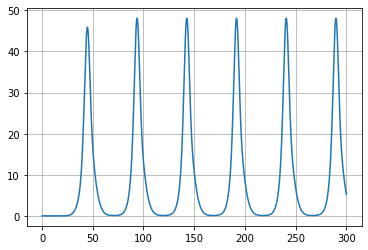

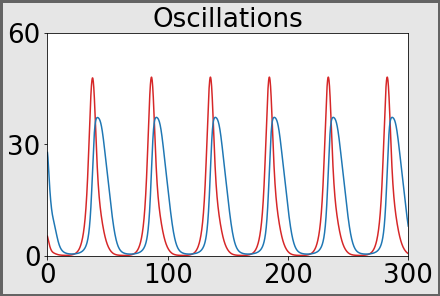

In [43]:
#### example oscillations
aln.params.mue_ext_mean = 0.2 * 5.
aln.params.mui_ext_mean = 0.1 * 5.

duration = 300.
aln.params.duration = duration

stim = np.zeros(( 1, int(duration/aln.params.dt) ))
aln.params.ext_exc_current = stim

aln.run()
plt.plot(aln.t, aln.rates_exc[0,:])
plt.show()

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]
        
setinit(init_state_vars, aln)

aln.run()

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True, linewidth=lw_,
                       edgecolor=darkgrey, facecolor=lightgrey)

ax.set_title('Oscillations', fontsize=fs_)

ax.plot(aln.t, aln.rates_exc[0,:], color=exc_red, label='$r_E$')
ax.plot(aln.t, aln.rates_inh[0,:], color=inh_blue, label='$r_I$')

ax.tick_params(axis='x', labelsize=fs_)
ax.tick_params(axis='y', labelsize=fs_)
#ax.set_xlabel(r'Time [ms]', fontsize=fs_)
#ax.set_ylabel('Activity [Hz]', fontsize=fs_)
ax.set_xlim(0,duration)
ax.set_ylim(0,60.)
ax.set_yticks(np.arange(0,61,30))
#ax.legend(fontsize=fs_)
ax.grid(False)

im_osc = 'osc.png'
fig.savefig(im_osc)
fig.savefig(os.path.join(savepath, im_osc), edgecolor=fig.get_edgecolor(), facecolor=fig.get_facecolor())
plt.show()

In [44]:
im0 = Image.open(im_highlc)
im1 = Image.open(im_highlow)
im2 = Image.open(im_osc)

In [54]:
p0 = [0.475, 0.6]
p0_encods = [0.5, 0.5]
p1 = [0.4, 0.322]

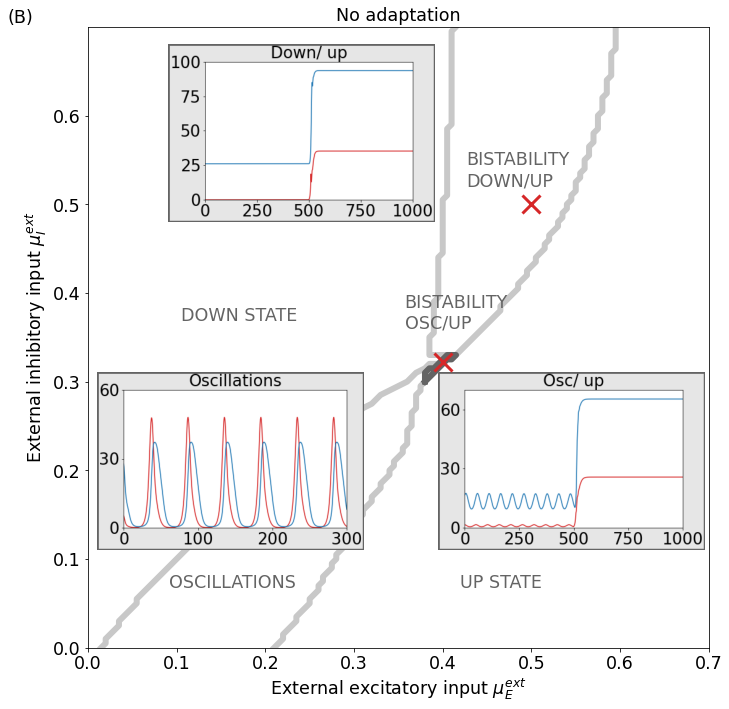

In [55]:
fs_=4*(24 / 5.5)
lw_ = 6
ms_ = 18
mew_=3
filename_ = 'statespace.png'

fig, ax = plt.subplots(figsize=(10,10), constrained_layout=True)
ax.set_title('No adaptation', fontsize=fs_)

ax.plot(exc_bi, inh_bi, linestyle=None, color=midgrey, linewidth=lw_)
ax.plot(exc_lc, inh_lc, linestyle=None, color=midgrey, linewidth=lw_)
ax.plot(exc_lch, inh_lch, linestyle=None, color=darkgrey, linewidth=lw_)

ax.tick_params(axis='x', labelsize=fs_)
ax.tick_params(axis='y', labelsize=fs_)
ax.set_xlabel(r'External excitatory input $\mu_E^{ext}$', fontsize=fs_)
ax.set_ylabel(r'External inhibitory input $\mu_I^{ext}$', fontsize=fs_)
ax.set_xlim(0.,0.7)
ax.set_ylim(0.,0.7)
ax.set_yticks(np.arange(0., 0.61, 0.1))
ax.grid(False)

ax.text(0.15, 0.55, 'DOWN STATE', horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes, fontsize=fs_, color=darkgrey)
ax.text(0.6, 0.12, 'UP STATE', horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes, fontsize=fs_, color=darkgrey)
ax.text(0.13, 0.12, 'OSCILLATIONS', horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes, fontsize=fs_, color=darkgrey)
ax.text(0.61, 0.8, 'BISTABILITY\nDOWN/UP', horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes, fontsize=fs_, color=darkgrey)
ax.text(0.51, 0.57, 'BISTABILITY\nOSC/UP', horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes, fontsize=fs_, color=darkgrey)

ax.text(-0.13, 1.03, '(B)', horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes, fontsize=fs_, color='black')

#ax.plot(p0[0], p0[1], color=exc_red, marker='x', markersize=ms_, mew=mew_)
ax.plot(p0_encods[0], p0_encods[1], color=exc_red, marker='x', markersize=ms_, mew=mew_)
ax.plot(p1[0], p1[1], color=exc_red, marker='x', markersize=ms_, mew=mew_)

wid = 0.3
hei = 0.2

x0,y0 = 0.395, 0.11
ax.imshow(im0, extent=(x0, x0+wid, y0, y0+hei))
x0,y0 = 0.09, 0.48
ax.imshow(im1, extent=(x0, x0+wid, y0, y0+hei))
x0,y0 = 0.01, 0.11
ax.imshow(im2, extent=(x0, x0+wid, y0, y0+hei), zorder=10)

filename_ = 'statespace.png'        
fig.savefig(filename_)
#fig.savefig(os.path.join(savepath_FENS, filename_))
fig.savefig(os.path.join(savepath_ENCODS, filename_))
plt.show()

In [48]:
aln = ALNModel()
N = aln.params.N

aln.params.sigma_ou = 0.
aln.params.mue_ext_mean = 0.
aln.params.mui_ext_mean = 0.
aln.params.ext_exc_current = 0.
aln.params.ext_inh_current = 0.

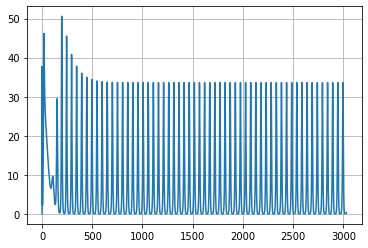

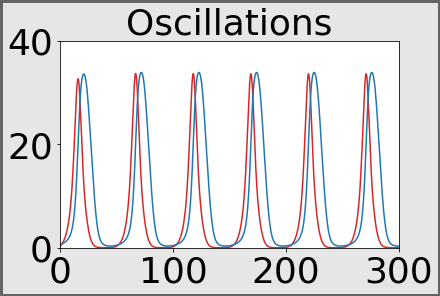

In [49]:
#### example oscillations
aln.params.mue_ext_mean = 0.5 * 5.
aln.params.mui_ext_mean = 0.1 * 5.

duration = 3030.
aln.params.duration = duration

stim = np.zeros(( 1, int(duration/aln.params.dt) ))
aln.params.ext_exc_current = stim

aln.run()
plt.plot(aln.t, aln.rates_exc[0,:])
plt.show()

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]
        
setinit(init_state_vars, aln)

duration = 300.
aln.params.duration = duration

aln.run()

fs_ = 36
lw_ = 5

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True, linewidth=lw_,
                       edgecolor=darkgrey, facecolor=lightgrey)

ax.set_title('Oscillations', fontsize=fs_)

ax.plot(aln.t, aln.rates_exc[0,:], color=exc_red, label='$r_E$')
ax.plot(aln.t, aln.rates_inh[0,:], color=inh_blue, label='$r_I$')

ax.tick_params(axis='x', labelsize=fs_)
ax.tick_params(axis='y', labelsize=fs_)
#ax.set_xlabel(r'Time [ms]', fontsize=fs_)
#ax.set_ylabel('Activity [Hz]', fontsize=fs_)
ax.set_xlim(0,duration)
ax.set_ylim(0,40.)
#ax.legend(fontsize=fs_)
ax.grid(False)

im_osc_adap = 'osc_adap.png'
fig.savefig(im_osc_adap)
fig.savefig(os.path.join(savepath, im_osc_adap), edgecolor=fig.get_edgecolor(),
            facecolor=fig.get_facecolor())
plt.show()

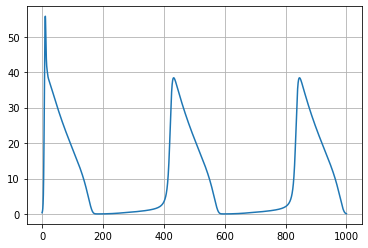

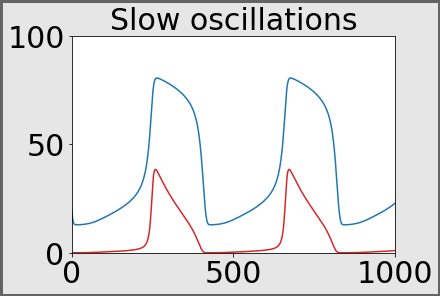

In [50]:
#### example slow oscillations
aln.params.mue_ext_mean = 0.81 * 5.
aln.params.mui_ext_mean = 0.4 * 5.

duration = 1000.
aln.params.duration = duration

stim = np.zeros(( 1, int(duration/aln.params.dt) ))
aln.params.ext_exc_current = stim

aln.run()
plt.plot(aln.t, aln.rates_exc[0,:])
plt.show()

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]
        
setinit(init_state_vars, aln)

aln.run()

fs_ = 30
lw_ = 5

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True, linewidth=lw_,
                       edgecolor=darkgrey, facecolor=lightgrey)

ax.set_title('Slow oscillations', fontsize=fs_)

ax.plot(aln.t, aln.rates_exc[0,:], color=exc_red, label='$r_E$')
ax.plot(aln.t, aln.rates_inh[0,:], color=inh_blue, label='$r_I$')

ax.tick_params(axis='x', labelsize=fs_)
ax.tick_params(axis='y', labelsize=fs_)
#ax.set_xlabel(r'Time [ms]', fontsize=fs_)
#ax.set_ylabel('Activity [Hz]', fontsize=fs_)
ax.set_xlim(0,duration)
ax.set_ylim(0,100.)
#ax.legend(fontsize=fs_)
ax.grid(False)

im_slow_osc_adap = 'slow_osc_adap.png'
fig.savefig(im_slow_osc_adap)
fig.savefig(os.path.join(savepath, im_slow_osc_adap), edgecolor=fig.get_edgecolor(),
            facecolor=fig.get_facecolor())
plt.show()

In [51]:
p0 = [0.86, 0.25]
p1 = [0.74, 0.37]

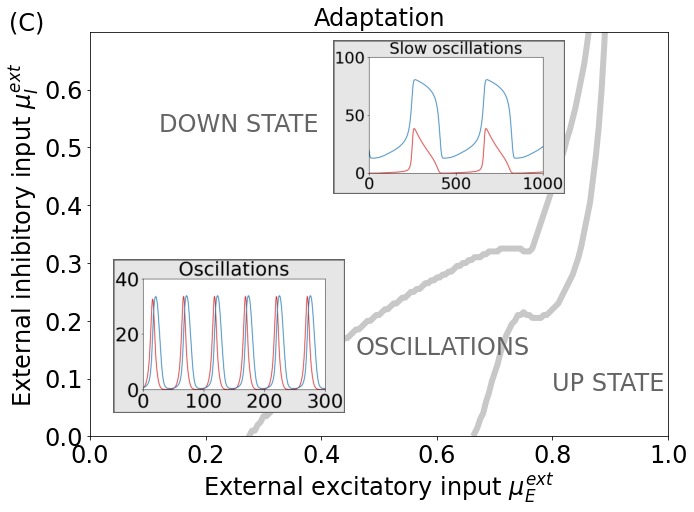

In [53]:
##### LOAD BOUNDARIES
data_file = '..' + os.sep + 'boundaries' + os.sep + 'boundary_adaptation.pickle'
with open(data_file,'rb') as f:
    load_array= pickle.load(f)
boundary_down = load_array[0]
boundary_up = load_array[1]

b_d = np.zeros(( len(boundary_down),len(boundary_down) ))
for b in range(len(boundary_down)):
    b_d[b,0] = boundary_down[b][0]
    b_d[b,1] = boundary_down[b][1]
    
b_u = np.zeros(( len(boundary_up),len(boundary_up) ))
for b in range(len(boundary_up)):
    b_u[b,0] = boundary_up[b][0]
    b_u[b,1] = boundary_up[b][1]

fs_=24
lw_ = 6
ms_ = 18
mew_=3
filename_ = 'statespace_adaptation.png'

fig, ax = plt.subplots(figsize=(10,7), constrained_layout=True)
ax.set_title('Adaptation', fontsize=fs_)


ax.plot(b_d[:,0], b_d[:,1], color=midgrey, linewidth=lw_)
ax.plot(b_u[:,0], b_u[:,1], color=midgrey, linewidth=lw_)

#ax.plot(p0[0], p0[1], color=exc_red, marker='x', markersize=ms_, mew=mew_)
#ax.plot(p1[0], p1[1], color=exc_red, marker='x', markersize=ms_, mew=mew_)

ax.text(0.12, 0.8, 'DOWN STATE', horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes, fontsize=fs_, color=darkgrey)
ax.text(0.8, 0.16, 'UP STATE', horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes, fontsize=fs_, color=darkgrey)
ax.text(0.46, 0.25, 'OSCILLATIONS', horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes, fontsize=fs_, color=darkgrey)

ax.text(-0.14, 1.05, '(C)', horizontalalignment='left', verticalalignment='top',
        transform=ax.transAxes, fontsize=fs_, color='black')

im3 = Image.open(im_osc_adap)
wid = 0.4
hei = 0.266
x0,y0 = 0.04, 0.04
ax.imshow(im3, extent=(x0, x0+wid, y0, y0+hei), zorder=10)

im4 = Image.open(im_slow_osc_adap)
x0,y0 = 0.42, 0.42
ax.imshow(im4, extent=(x0, x0+wid, y0, y0+hei), zorder=10)

ax.tick_params(axis='x', labelsize=fs_)
ax.tick_params(axis='y', labelsize=fs_)
ax.set_xlabel(r'External excitatory input $\mu_E^{ext}$', fontsize=fs_)
ax.set_ylabel(r'External inhibitory input $\mu_I^{ext}$', fontsize=fs_)
ax.set_xlim(0., 1.)
ax.set_ylim(0.,0.7)
ax.set_yticks(np.arange(0., 0.61, 0.1))
ax.grid(False)
        
fig.savefig(filename_)
#fig.savefig(os.path.join(savepath_FENS, filename_))
fig.savefig(os.path.join(savepath_ENCODS, filename_))
plt.show()

In [69]:
points = np.array( [ [0.4, 0.35], [0.4, 0.4], [0.45, 0.4], [0.425, 0.45], [0.475, 0.45], [0.45, 0.5],
                    [0.5, 0.5], [0.45, 0.65], [0.5, 0.65], [0.55, 0.65] ])

point_1 = np.array( [ [0.4, 0.322] ])

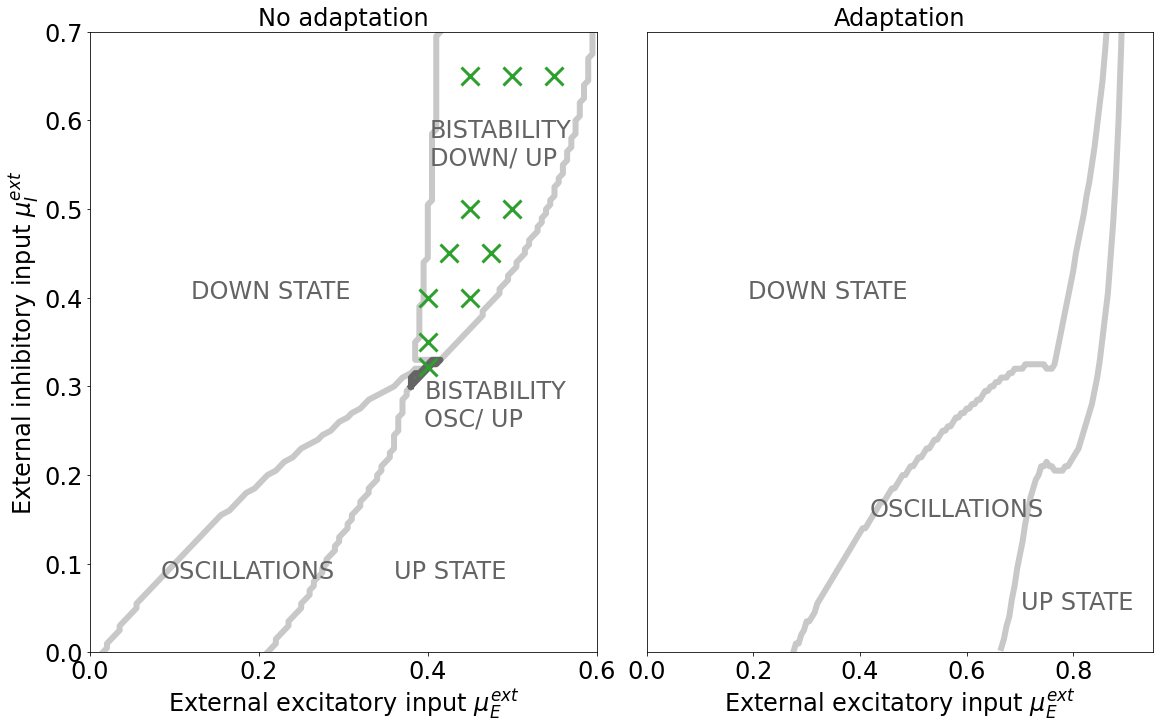

In [70]:
fs_=24
lw_ = 6
ms_ = 18
mew_=3

fig, ax = plt.subplots(1,2, figsize=(16,10), constrained_layout=True)

ax[1].set_title('Adaptation', fontsize=fs_)

ax[1].plot(b_d[:,0], b_d[:,1], color=midgrey, linewidth=lw_)
ax[1].plot(b_u[:,0], b_u[:,1], color=midgrey, linewidth=lw_)

#ax[0].plot(p0[0], p0[1], color=exc_red, marker='x', markersize=ms_, mew=mew_)
#ax[0].plot(p1[0], p1[1], color=exc_red, marker='x', markersize=ms_, mew=mew_)

ax[1].text(0.2, 0.6, 'DOWN STATE', horizontalalignment='left', verticalalignment='top',
        transform=ax[1].transAxes, fontsize=fs_, color=darkgrey)
ax[1].text(0.74, 0.1, 'UP STATE', horizontalalignment='left', verticalalignment='top',
        transform=ax[1].transAxes, fontsize=fs_, color=darkgrey)
ax[1].text(0.44, 0.25, 'OSCILLATIONS', horizontalalignment='left', verticalalignment='top',
        transform=ax[1].transAxes, fontsize=fs_, color=darkgrey)

ax[0].set_title('No adaptation', fontsize=fs_)

ax[0].plot(exc_bi, inh_bi, linestyle=None, color=midgrey, linewidth=lw_)
ax[0].plot(exc_lc, inh_lc, linestyle=None, color=midgrey, linewidth=lw_)
ax[0].plot(exc_lch, inh_lch, linestyle=None, color=darkgrey, linewidth=lw_)

for i in range(2):
    ax[i].tick_params(axis='x', labelsize=fs_)
    ax[i].tick_params(axis='y', labelsize=fs_)
    ax[i].set_xlabel(r'External excitatory input $\mu_E^{ext}$', fontsize=fs_)
    ax[i].set_ylim(0.,0.7)
    ax[i].grid(False)
    
ax[1].set_xlim(0.,.95)
ax[1].set_xticks(np.arange(0., .91, 0.2))

ax[0].set_xlim(0.,0.6)
ax[0].set_xticks(np.arange(0., 0.71, 0.2))
    
ax[0].set_yticks(np.arange(0., 0.71, 0.1))
ax[1].set_yticks([])
ax[0].set_ylabel(r'External inhibitory input $\mu_I^{ext}$', fontsize=fs_)

ax[0].text(0.2, 0.6, 'DOWN STATE', horizontalalignment='left', verticalalignment='top',
        transform=ax[0].transAxes, fontsize=fs_, color=darkgrey)
ax[0].text(0.6, 0.15, 'UP STATE', horizontalalignment='left', verticalalignment='top',
        transform=ax[0].transAxes, fontsize=fs_, color=darkgrey)
ax[0].text(0.14, 0.15, 'OSCILLATIONS', horizontalalignment='left', verticalalignment='top',
        transform=ax[0].transAxes, fontsize=fs_, color=darkgrey)
ax[0].text(0.67, 0.86, 'BISTABILITY\nDOWN/ UP', horizontalalignment='left', verticalalignment='top',
        transform=ax[0].transAxes, fontsize=fs_, color=darkgrey)
ax[0].text(0.66, 0.44, 'BISTABILITY\nOSC/ UP', horizontalalignment='left', verticalalignment='top',
        transform=ax[0].transAxes, fontsize=fs_, color=darkgrey)

for p in point_1:
    ax[0].plot(p[0], p[1], color=green, marker='x', markersize=ms_, mew=mew_)
    
for p in points:
    ax[0].plot(p[0], p[1], color=green, marker='x', markersize=ms_, mew=mew_)
    
filename_ = 'statespace_10points.png'   
savepath_writing = (os.getcwd().split('neurolib')[0] + 'writing' + os.sep + 'paper2_chaos' + os.sep + 'chaos'
                    + os.sep + 'images')
fig.savefig(filename_)
fig.savefig(os.path.join(savepath_writing, filename_))
plt.show()